# Categorical Feature Encoding
Encode categorical variables

## Overview
- **Low cardinality variables** (≤20 unique values): One-hot encoding
- **High cardinality variables** (>20 unique values): Label encoding or frequency encoding
- **Special handling** for amenities, neighborhoods, and host features

## Features to encode:
1. **Host features**: superhost status, response time, verifications
2. **Property features**: room type, property type
3. **Neighborhood features**: one-hot encoding for all neighborhoods
4. **Amenities**: extract binary features for common amenities
5. **Other categorical**: response rates, availability, etc.

In [1]:
# Import required libraries
import os, sys
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), "..")))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import our categorical encoding functions
from src.features.categorical import encode_all_categorical_features

# Set up plotting
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
# Load the features data
base_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
features_path = os.path.join(base_path, "data", "processed", "features", "listings_features.csv")

df = pd.read_csv(features_path)
print(f"Loaded data shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Display basic info about categorical variables
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print(f"\nCategorical columns: {len(cat_cols)}")
for col in cat_cols:
    print(f"  {col}: {df[col].nunique()} unique values")

Loaded data shape: (7096, 79)
Columns: ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of

In [3]:
# Encode all categorical features
df_encoded = encode_all_categorical_features(df)

print(f"\n=== ENCODING RESULTS ===")
print(f"Original shape: {df.shape}")
print(f"Encoded shape: {df_encoded.shape}")
print(f"New features added: {df_encoded.shape[1] - df.shape[1]}")

# Check remaining categorical columns
remaining_cat_cols = df_encoded.select_dtypes(include=['object', 'category']).columns
print(f"\nRemaining categorical columns: {len(remaining_cat_cols)}")
if len(remaining_cat_cols) > 0:
    for col in remaining_cat_cols:
        print(f"  {col}: {df_encoded[col].nunique()} unique values")

🚀 Starting categorical feature encoding...

1. Encoding host features...
  ✅ host_is_superhost: ensured binary values (0/1)
  ✅ host_has_profile_pic: ensured binary values (0/1)
  ✅ host_identity_verified: ensured binary values (0/1)
  ✅ instant_bookable: ensured binary values (0/1)
  ✅ host_response_time: ordinal encoded
  ✅ host_verifications: converted to count
  ✅ host_response_rate: ensured values in [0,1] range
  ✅ host_acceptance_rate: ensured values in [0,1] range

2. Encoding property features...
  ✅ room_type: 4 dummy variables
  ✅ property_type: 11 dummy variables (top 10 + Other)

3. Encoding neighborhood features...
Encoding neighbourhood_cleansed...
  ✅ Created 25 neighborhood dummy variables

4. Extracting amenities features...
Extracting features from amenities...
  ✅ Created 23 amenity features + amenities_count

5. Encoding low cardinality categorical variables...
Encoding 4 low cardinality categorical variables...
  ✅ last_scraped: 2 dummy variables created
  ✅ sourc

In [4]:
# Analyze the encoded features
print("=== ANALYSIS OF ENCODED FEATURES ===")

# Show new features by category
new_features = set(df_encoded.columns) - set(df.columns)
print(f"\nNew features created: {len(new_features)}")

# Group features by type
amenity_features = [col for col in new_features if col.startswith('amenity_')]
neighborhood_features = [col for col in new_features if col.startswith('neighborhood_')]
room_type_features = [col for col in new_features if col.startswith('room_type_')]
property_type_features = [col for col in new_features if col.startswith('property_type_')]
other_features = new_features - set(amenity_features) - set(neighborhood_features) - set(room_type_features) - set(property_type_features)

print(f"\nFeature breakdown:")
print(f"  Amenity features: {len(amenity_features)}")
print(f"  Neighborhood features: {len(neighborhood_features)}")
print(f"  Room type features: {len(room_type_features)}")
print(f"  Property type features: {len(property_type_features)}")
print(f"  Other features: {len(other_features)}")

# Show some examples
print(f"\nSample amenity features: {list(amenity_features)[:5]}")
print(f"Sample neighborhood features: {list(neighborhood_features)[:5]}")
print(f"Sample other features: {list(other_features)[:5]}")

=== ANALYSIS OF ENCODED FEATURES ===

New features created: 73

Feature breakdown:
  Amenity features: 23
  Neighborhood features: 25
  Room type features: 4
  Property type features: 11
  Other features: 10

Sample amenity features: ['amenity_free_parking', 'amenity_pets_allowed', 'amenity_microwave', 'amenity_balcony', 'amenity_pool']
Sample neighborhood features: ['neighborhood_Laim', 'neighborhood_Ludwigsvorstadt-Isarvorstadt', 'neighborhood_Ramersdorf-Perlach', 'neighborhood_Sendling-Westpark', 'neighborhood_Pasing-Obermenzing']
Sample other features: ['last_scraped_2025-03-19', 'host_verifications_count', 'host_response_time_encoded', 'calendar_last_scraped_2025-03-19', 'source_city scrape']


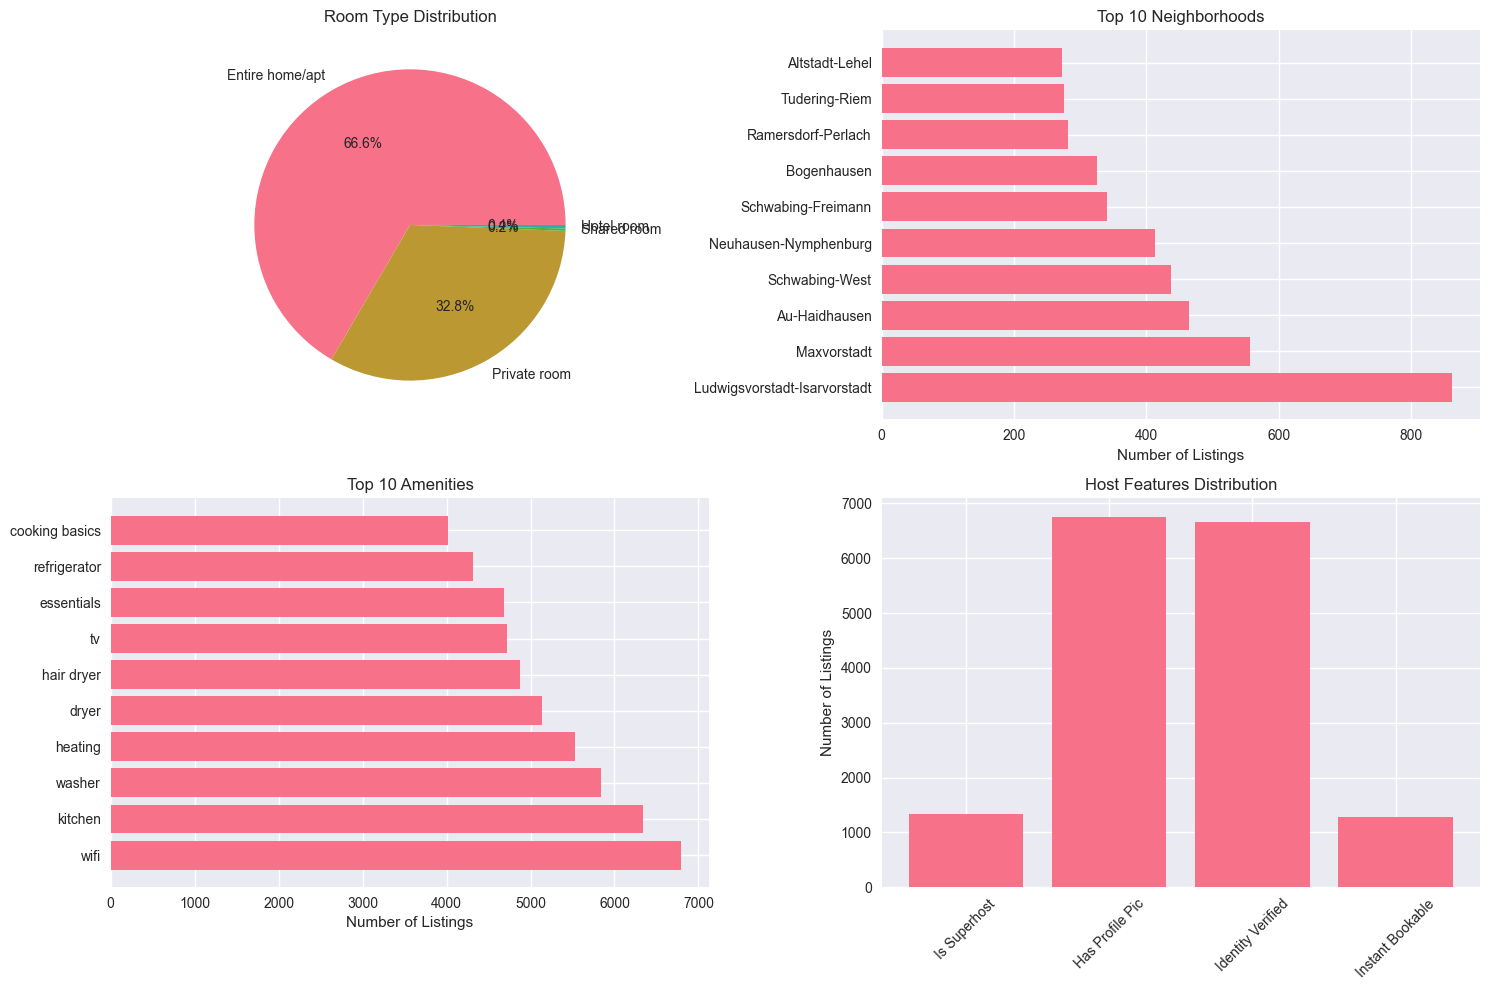

In [5]:
# Visualize some of the encoded features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Room type distribution
if 'room_type_Entire home/apt' in df_encoded.columns:
    room_types = ['room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room', 'room_type_Hotel room']
    room_counts = [df_encoded[col].sum() for col in room_types if col in df_encoded.columns]
    room_labels = [col.replace('room_type_', '') for col in room_types if col in df_encoded.columns]
    
    axes[0, 0].pie(room_counts, labels=room_labels, autopct='%1.1f%%')
    axes[0, 0].set_title('Room Type Distribution')

# 2. Top neighborhoods
neighborhood_cols = [col for col in df_encoded.columns if col.startswith('neighborhood_')]
if neighborhood_cols:
    neighborhood_counts = [(col.replace('neighborhood_', ''), df_encoded[col].sum()) for col in neighborhood_cols]
    neighborhood_counts.sort(key=lambda x: x[1], reverse=True)
    
    top_neighborhoods = neighborhood_counts[:10]
    names, counts = zip(*top_neighborhoods)
    
    axes[0, 1].barh(range(len(names)), counts)
    axes[0, 1].set_yticks(range(len(names)))
    axes[0, 1].set_yticklabels(names)
    axes[0, 1].set_title('Top 10 Neighborhoods')
    axes[0, 1].set_xlabel('Number of Listings')

# 3. Popular amenities
amenity_cols = [col for col in df_encoded.columns if col.startswith('amenity_')]
if amenity_cols:
    amenity_counts = [(col.replace('amenity_', '').replace('_', ' '), df_encoded[col].sum()) for col in amenity_cols]
    amenity_counts.sort(key=lambda x: x[1], reverse=True)
    
    top_amenities = amenity_counts[:10]
    names, counts = zip(*top_amenities)
    
    axes[1, 0].barh(range(len(names)), counts)
    axes[1, 0].set_yticks(range(len(names)))
    axes[1, 0].set_yticklabels(names)
    axes[1, 0].set_title('Top 10 Amenities')
    axes[1, 0].set_xlabel('Number of Listings')

# 4. Host features
host_features = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
host_counts = []
host_labels = []
for feature in host_features:
    if feature in df_encoded.columns:
        host_counts.append(df_encoded[feature].sum())
        host_labels.append(feature.replace('host_', '').replace('_', ' ').title())

if host_counts:
    axes[1, 1].bar(host_labels, host_counts)
    axes[1, 1].set_title('Host Features Distribution')
    axes[1, 1].set_ylabel('Number of Listings')
    axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [6]:
# Save the encoded data
output_path = os.path.join(base_path, "data", "processed", "features", "listings_encoded.csv")
df_encoded.to_csv(output_path, index=False)

print(f"✅ Encoded data saved to: {output_path}")
print(f"Final dataset shape: {df_encoded.shape}")
print(f"Features breakdown:")
print(f"  - Original features: {df.shape[1]}")
print(f"  - New encoded features: {df_encoded.shape[1] - df.shape[1]}")
print(f"  - Total features: {df_encoded.shape[1]}")

# Show data types
print(f"\nData types:")
print(df_encoded.dtypes.value_counts())

✅ Encoded data saved to: /Users/claudiupanainte/Desktop/Airbnb-price-prediction_02/data/processed/features/listings_encoded.csv
Final dataset shape: (7096, 132)
Features breakdown:
  - Original features: 79
  - New encoded features: 53
  - Total features: 132

Data types:
bool       47
int64      46
float64    39
Name: count, dtype: int64


## Summary

### What was encoded:
1. **Host features**: Binary encoding for superhost, profile pic, identity verification
2. **Property features**: One-hot encoding for room types and top property types
3. **Neighborhood features**: One-hot encoding for all 25 neighborhoods
4. **Amenities**: Binary features for 23 common amenities + total count
5. **Other categorical**: Response times, rates, availability flags

### Benefits:
- **Interpretability**: Binary features are easy to understand
- **Model performance**: Categorical variables are now numerical
- **Feature richness**: Extracted meaningful features from text data
- **Scalability**: Handles both low and high cardinality variables appropriately

### Next steps:
- Use this encoded dataset for model training
- Consider feature selection to reduce dimensionality
- Apply appropriate scaling to numerical features